In [3]:
import pandas as pd

data = pd.read_csv('report.csv')

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Algorithm  40 non-null     object 
 1   Run        40 non-null     int64  
 2   Score      40 non-null     int64  
 3   Moves      40 non-null     int64  
 4   Time       40 non-null     float64
dtypes: float64(1), int64(3), object(1)
memory usage: 1.7+ KB


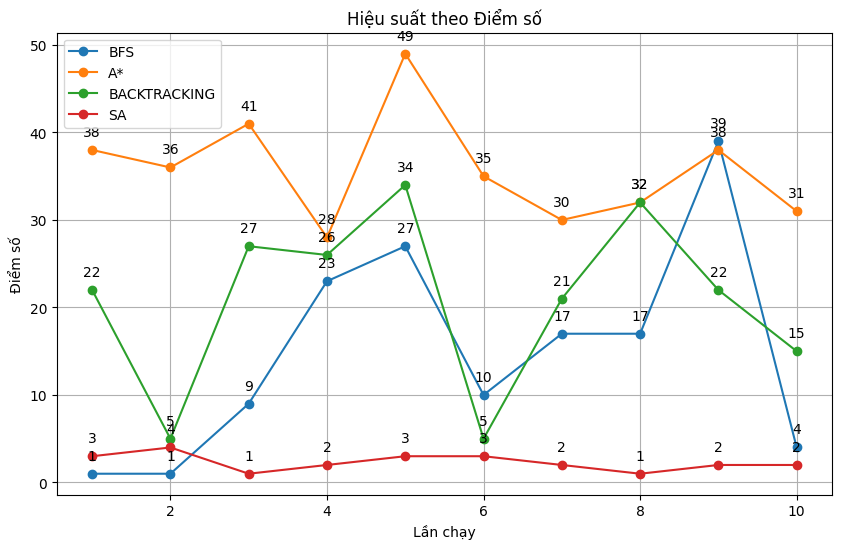

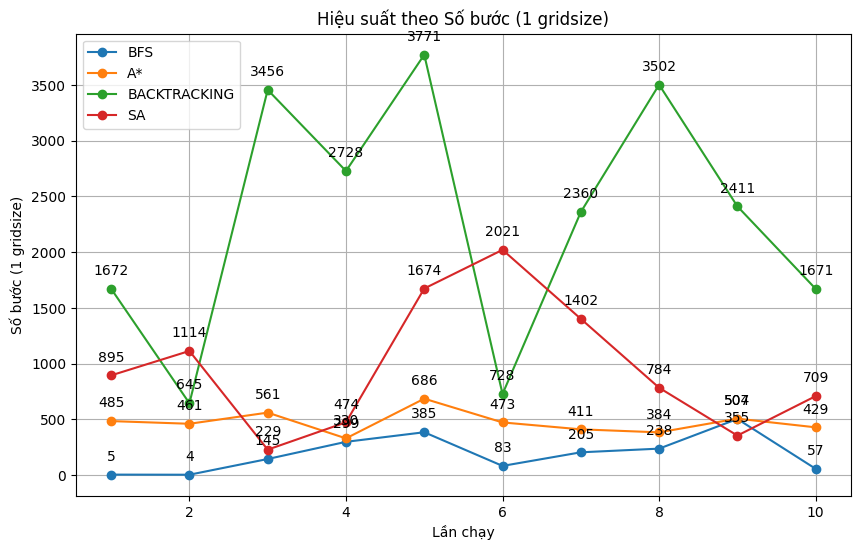

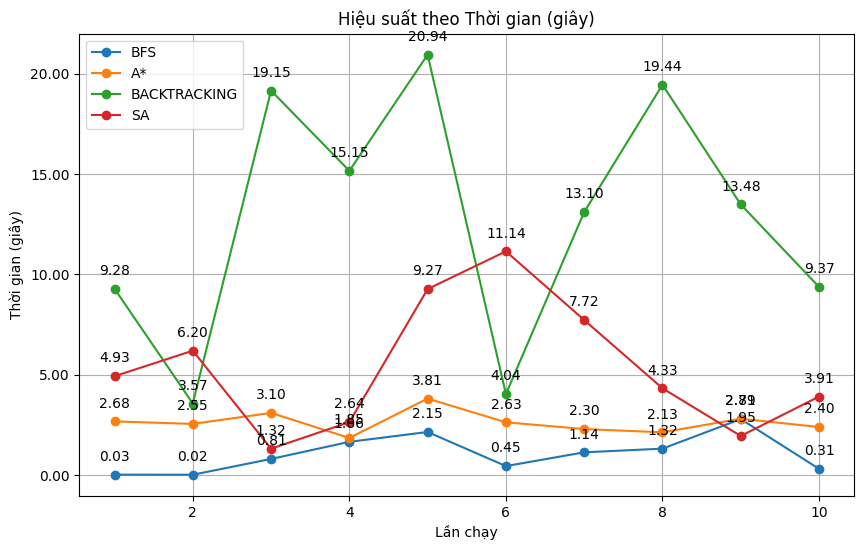

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick  # Thêm thư viện để định dạng số

data = pd.read_csv('report.csv')

metrics = ['Score', 'Moves', 'Time']
titles = ['Điểm số', 'Số bước (1 gridsize)', 'Thời gian (giây)']

for metric, title in zip(metrics, titles):
    plt.figure(figsize=(10, 6))
    for algo in data['Algorithm'].unique():
        subset = data[data['Algorithm'] == algo]
        plt.plot(subset['Run'], subset[metric], marker='o', label=algo)
        
        # Thêm nhãn cho từng điểm dữ liệu
        for i, txt in enumerate(subset[metric]):
            # Định dạng giá trị cho đồ thị "Thời gian"
            if metric == 'Time':
                txt = f"{txt:.2f}"
            plt.annotate(txt, (subset['Run'].iloc[i], subset[metric].iloc[i]), textcoords="offset points", xytext=(0,10), ha='center')
    
    plt.title(f'Hiệu suất theo {title}')
    plt.xlabel('Lần chạy')
    plt.ylabel(title)
    plt.legend()
    plt.grid(True)
    
    # Định dạng trục y để hiển thị 2 chữ số sau dấu phẩy cho đồ thị "Thời gian"
    if metric == 'Time':
        plt.gca().yaxis.set_major_formatter(mtick.FormatStrFormatter('%.2f'))
    
    plt.show()